# Proyek Analisis Data: Nama dataset
- Nama : Fawzan Ibnu Fajar
- Email : fawzanibnufajar@gmail.com
- Id Dicoding : fawzanibnu

## Menentukan Pertanyaan Bisnis

- Musim mana yang memiliki jumlah Transaksi terbanyak?
- Bagaimana perbandingan penjualan antara customer Registered dan Casual?
- Bagaimana perbandingan transaksi di setiap sesi? (Weekday/Weekend/Holiday, beserta jam jam krusial) 
- Bagaimana pertumbuhan minat pengguna dari waktu ke waktu?
- Bagaimana pengaruh suhu terhadap minat konsumen dalam melakukan transaksi?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

### Assessing Data

In [3]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
print("\nStatistik Deskriptif Data Hour:")
print(hour_df.describe())


Statistik Deskriptif Data Hour:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771   

In [6]:
print("\nStatistik Deskriptif Data Day:")
print(day_df.describe())


Statistik Deskriptif Data Day:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19048

### Cleaning Data

In [7]:
w = (hour_df.temp == 0).sum()
x = (hour_df.atemp == 0).sum()
y = (hour_df.hum == 0).sum()
z = (hour_df.windspeed == 0).sum()

print("TABEL hour.csv")
print("Nilai 0 di kolom temp ada: ", w)
print("Nilai 0 di kolom atemp ada: ", x)
print("Nilai 0 di kolom hum ada: ", y)
print("Nilai 0 di kolom windspeed ada: ", z)

TABEL hour.csv
Nilai 0 di kolom temp ada:  0
Nilai 0 di kolom atemp ada:  2
Nilai 0 di kolom hum ada:  22
Nilai 0 di kolom windspeed ada:  2180


In [8]:
w = (day_df.temp == 0).sum()
x = (day_df.atemp == 0).sum()
y = (day_df.hum == 0).sum()
z = (day_df.windspeed == 0).sum()

print("TABEL day.csv")
print("Nilai 0 di kolom temp ada: ", w)
print("Nilai 0 di kolom atemp ada: ", x)
print("Nilai 0 di kolom hum ada: ", y)
print("Nilai 0 di kolom windspeed ada: ", z)

TABEL day.csv
Nilai 0 di kolom temp ada:  0
Nilai 0 di kolom atemp ada:  0
Nilai 0 di kolom hum ada:  1
Nilai 0 di kolom windspeed ada:  0


In [9]:
# Menggantikan nilai 0 dengan NaN pada kolom-kolom yang seharusnya tidak memiliki nilai 0
cols_to_replace_with_nan = ['temp', 'atemp', 'hum', 'windspeed']
hour_df[cols_to_replace_with_nan] = hour_df[cols_to_replace_with_nan].replace(0, np.nan)
day_df[cols_to_replace_with_nan] = hour_df[cols_to_replace_with_nan].replace(0, np.nan)
# Menghapus baris dengan nilai NaN dari kedua DataFrame
hour_df.dropna(inplace=True)
day_df.dropna(inplace=True)

# Menghapus baris dengan nilai 0 pada kolom 'cnt' (jumlah peminjaman)
hour_df = hour_df[hour_df['cnt'] != 0]
day_df = day_df[day_df['cnt'] != 0]

In [10]:
w = (hour_df.temp + day_df.temp == 0).sum()
x = (hour_df.atemp + day_df.atemp == 0).sum()
y = (hour_df.hum + day_df.hum == 0).sum()
z = (hour_df.windspeed + day_df.windspeed == 0).sum()

print("TOTAL NILAI 0 DI KEDUA TABEL")
print("Nilai 0 di kolom temp ada: ", w)
print("Nilai 0 di kolom atemp ada: ", x)
print("Nilai 0 di kolom hum ada: ", y)
print("Nilai 0 di kolom windspeed ada: ", z)

TOTAL NILAI 0 DI KEDUA TABEL
Nilai 0 di kolom temp ada:  0
Nilai 0 di kolom atemp ada:  0
Nilai 0 di kolom hum ada:  0
Nilai 0 di kolom windspeed ada:  0


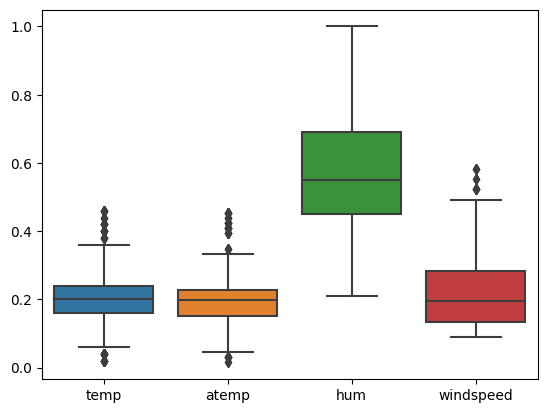

In [11]:
sns.boxplot(data=day_df[['temp', 'atemp', 'hum', 'windspeed']], showfliers=True)
plt.show()

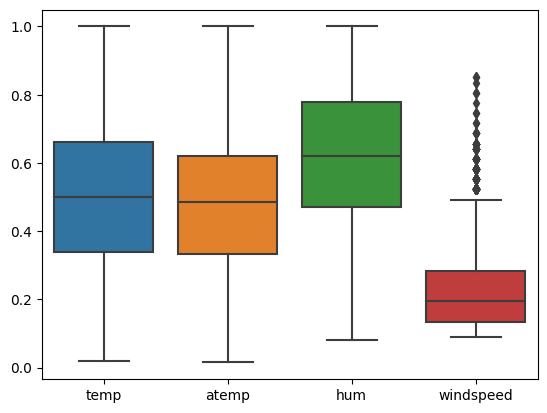

In [12]:
sns.boxplot(data=hour_df[['temp', 'atemp', 'hum', 'windspeed']], showfliers=True)
plt.show()

In [13]:
Q1 = day_df[['temp', 'atemp', 'hum', 'windspeed']].quantile(0.25)
Q3 = day_df[['temp', 'atemp', 'hum', 'windspeed']].quantile(0.75)
IQR = Q3 - Q1
day_df = day_df[~((day_df[['temp', 'atemp', 'hum', 'windspeed']]<(Q1-1.5*IQR))|(day_df[['temp', 'atemp', 'hum', 'windspeed']]>(Q3+1.5*IQR))).any(axis=1)]

day_df.shape

(576, 16)

In [14]:
Q1 = hour_df[['temp', 'atemp', 'hum', 'windspeed']].quantile(0.25)
Q3 = hour_df[['temp', 'atemp', 'hum', 'windspeed']].quantile(0.75)
IQR = Q3 - Q1
hour_df = hour_df[~((hour_df[['temp', 'atemp', 'hum', 'windspeed']]<(Q1-1.5*IQR))|(hour_df[['temp', 'atemp', 'hum', 'windspeed']]>(Q3+1.5*IQR))).any(axis=1)]

hour_df.shape

(14946, 17)

In [15]:
print('Info data duplikat day:', day_df.duplicated().sum())
print('Info data duplikat hour:', hour_df.duplicated().sum())

Info data duplikat day: 0
Info data duplikat hour: 0


## Exploratory Data Analysis (EDA)

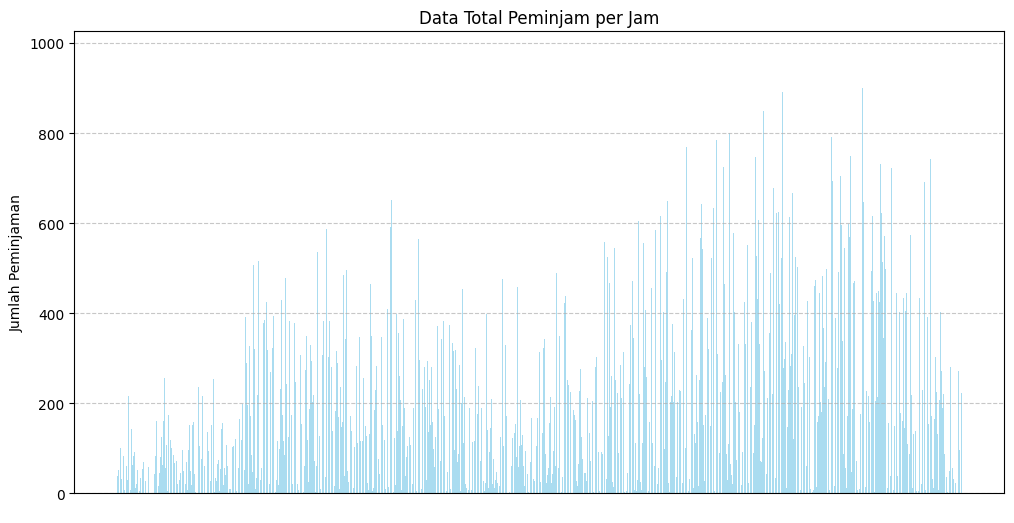

In [16]:
# Data untuk visualisasi
rentals = hour_df['cnt']

# Visualisasikan data menggunakan bar chart tanpa label jam
plt.figure(figsize=(12, 6))
plt.bar(range(len(rentals)), rentals, alpha=0.7, color='skyblue')
plt.xlabel(' ')
plt.ylabel('Jumlah Peminjaman')
plt.title('Data Total Peminjam per Jam')
plt.xticks([])  # Menghapus label sumbu X
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

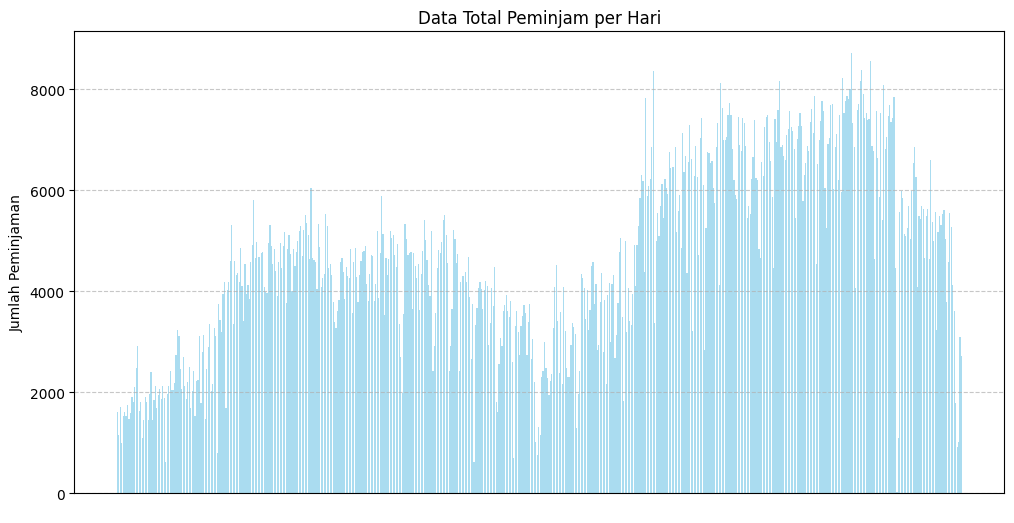

In [17]:
# Data untuk visualisasi
rentals = day_df['cnt']

# Visualisasikan data menggunakan bar chart tanpa label jam
plt.figure(figsize=(12, 6))
plt.bar(range(len(rentals)), rentals, alpha=0.7, color='skyblue')
plt.xlabel(' ')
plt.ylabel('Jumlah Peminjaman')
plt.title('Data Total Peminjam per Hari')
plt.xticks([])  # Menghapus label sumbu X
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

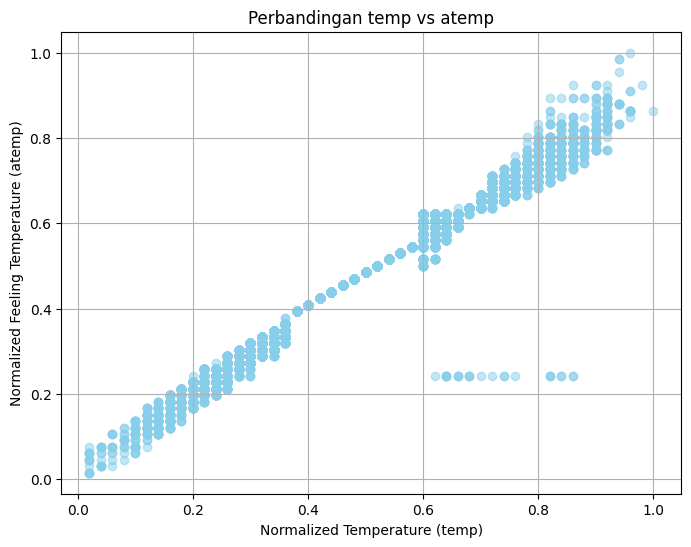

In [18]:
# Data untuk visualisasi
temp = hour_df['temp']
atemp = hour_df['atemp']

# Visualisasikan perbedaan antara temp dan atemp menggunakan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp, atemp, alpha=0.5, color='skyblue')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Normalized Feeling Temperature (atemp)')
plt.title('Perbandingan temp vs atemp')
plt.grid()

plt.show()

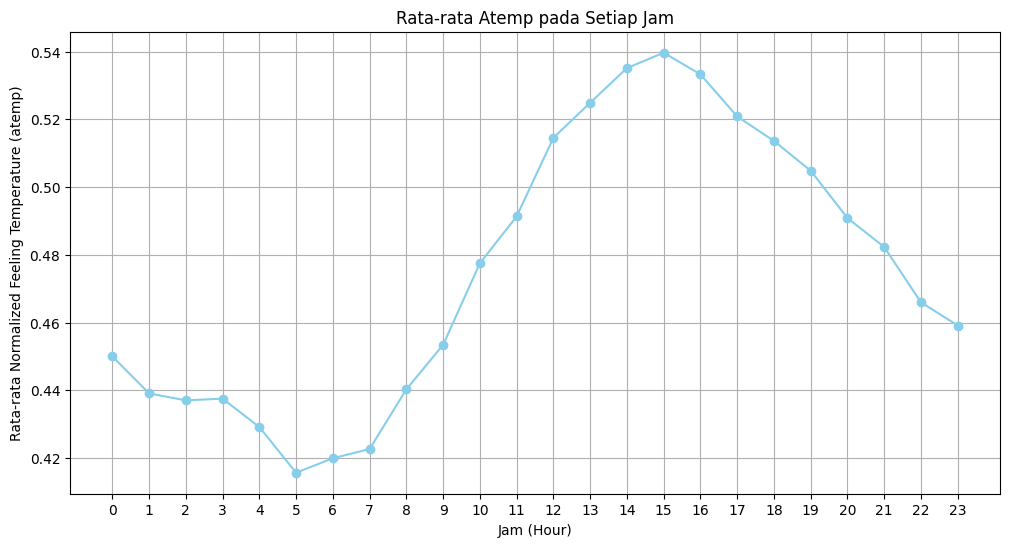

In [19]:
# Agregasi data dengan menghitung rata-rata atemp untuk setiap jam
hourly_atemp_avg = hour_df.groupby('hr')['atemp'].mean()

# Data untuk visualisasi
hours = hourly_atemp_avg.index
atemp_avg = hourly_atemp_avg.values

# Visualisasikan rata-rata atemp pada setiap jam
plt.figure(figsize=(12, 6))
plt.plot(hours, atemp_avg, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Jam (Hour)')
plt.ylabel('Rata-rata Normalized Feeling Temperature (atemp)')
plt.title('Rata-rata Atemp pada Setiap Jam')
plt.xticks(range(24))
plt.grid()

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim mana yang memiliki jumlah Transaksi terbanyak?

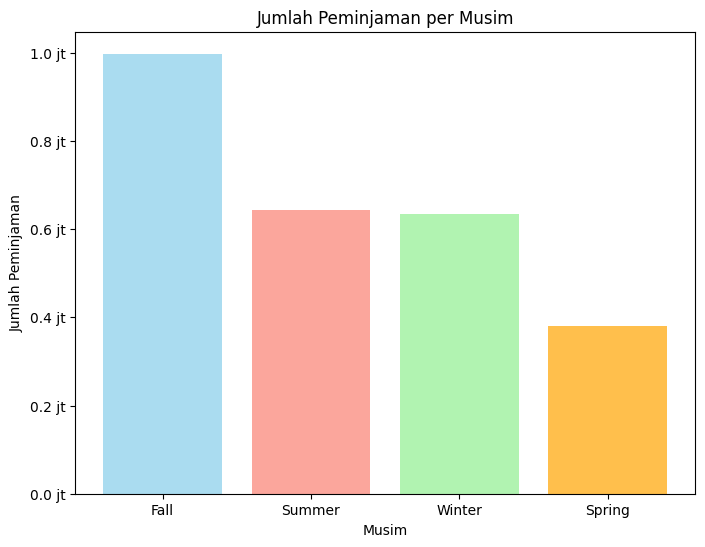

In [20]:
# Membuat peta musim (season) ke nama musim
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengganti nilai numerik di kolom 'season' dengan nama musim
day_df['season'] = day_df['season'].map(season_map)

# Agregasi data per musim dan hitung jumlah total peminjaman
seasonly_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Mengurutkan musim berdasarkan jumlah peminjaman terbanyak hingga terendah
seasonly_rentals = seasonly_rentals.sort_values(by='cnt', ascending=False)

# Warna yang berbeda untuk setiap bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Fungsi untuk mengatur format angka dengan pemisah ribuan
def format_millions(x, pos):
    return f'{x/1e6:.1f} jt'

# Visualisasikan data menggunakan bar chart dengan warna yang berbeda
plt.figure(figsize=(8, 6))
plt.bar(seasonly_rentals['season'], seasonly_rentals['cnt'], alpha=0.7, color=colors)
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')

# Mengatur format angka pada sumbu Y
y_format = mticker.FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(y_format)

plt.title('Jumlah Peminjaman per Musim')
plt.show()

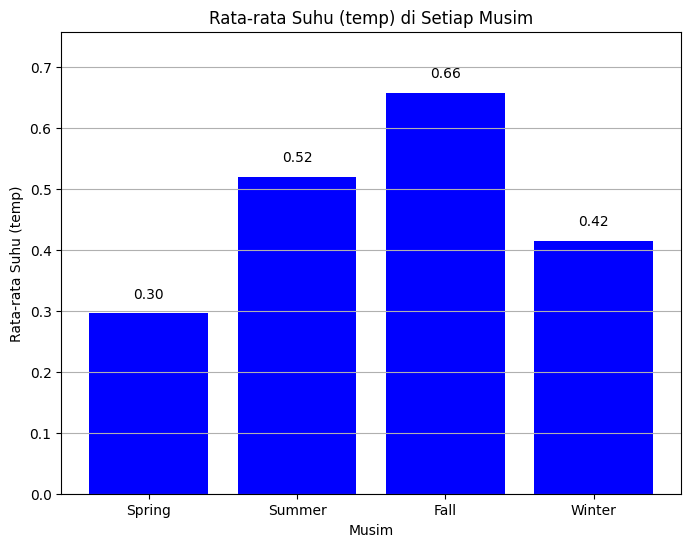

In [34]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata "temp"
season_avg_temp = hour_df.groupby('season')['atemp'].mean()

# Musim
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# Data untuk visualisasi
avg_temps = season_avg_temp.values

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(seasons, avg_temps, color='b')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Suhu (temp)')
plt.title('Rata-rata Suhu (temp) di Setiap Musim')
plt.ylim(0, max(avg_temps) + 0.1)  # Menetapkan batas atas pada grafik
plt.grid(axis='y')

# Menambahkan label nilai pada setiap bar
for i, temp in enumerate(avg_temps):
    plt.text(i, temp + 0.02, f'{temp:.2f}', ha='center', va='bottom')

plt.show()

### Pertanyaan 2: Bagaimana perbandingan penjualan antara customer Registered dan Casual?

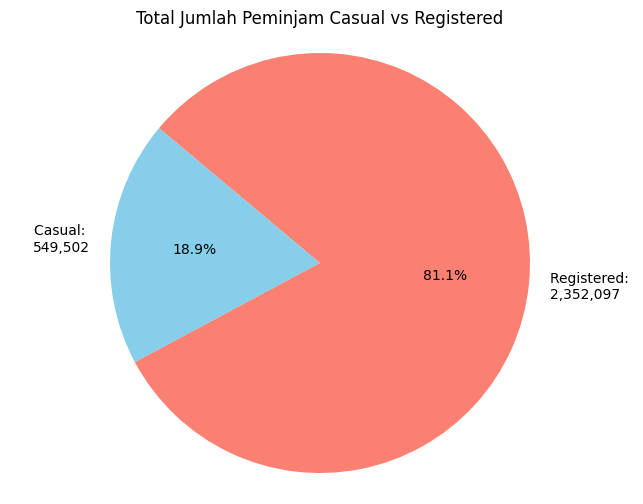

In [21]:
# Agregasi jumlah peminjam casual dan registered
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

# Data untuk pie chart
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['skyblue', 'salmon']

# Format angka total dalam bentuk ribuan (dengan tanda titik)
formatted_total_casual = f'{total_casual:,}'
formatted_total_registered = f'{total_registered:,}'

# Text yang akan ditampilkan pada pie chart
casual_label = f'Casual: \n{formatted_total_casual}'
registered_label = f'Registered: \n{formatted_total_registered}'

# Visualisasikan data menggunakan pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=[casual_label, registered_label], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Jumlah Peminjam Casual vs Registered')
plt.axis('equal')

plt.show()

### Pertanyaan 3: Bagaimana perbandingan transaksi di setiap sesi? (Weekday/Weekend/Holiday, beserta jam jam krusial) 

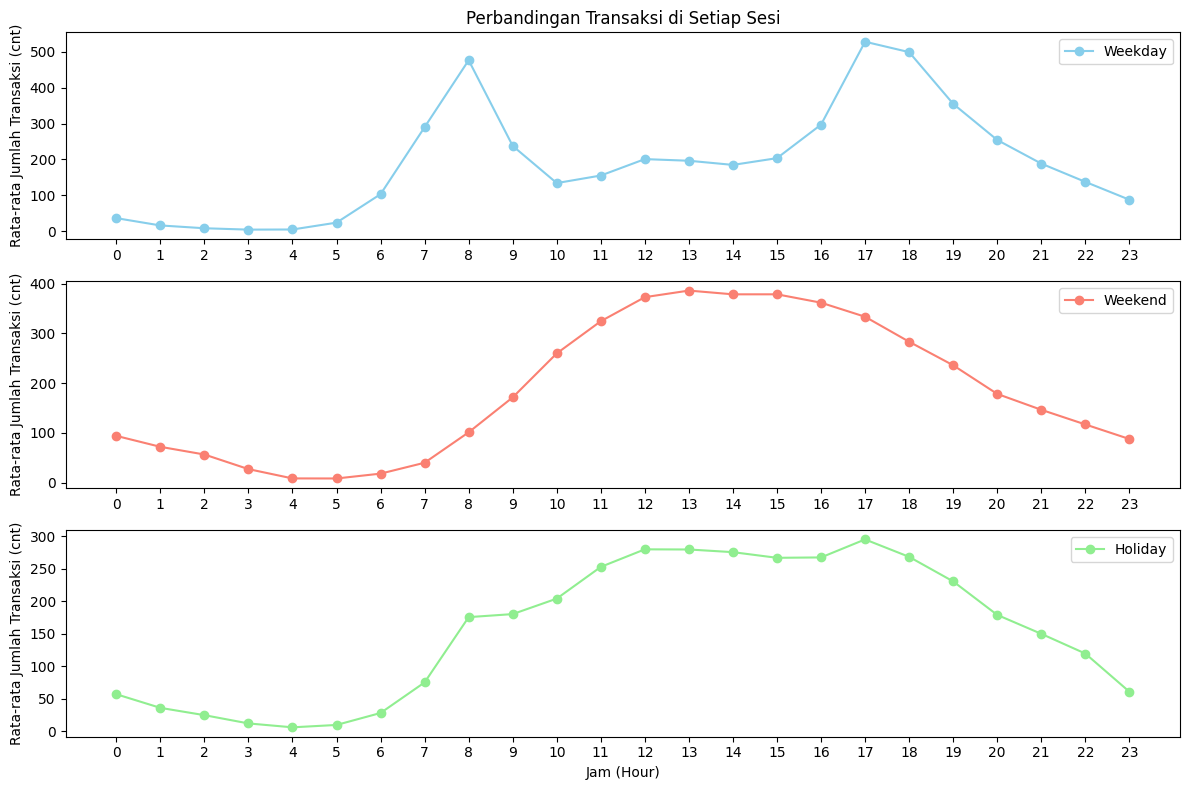

In [36]:
# Mengelompokkan data berdasarkan sesi (Weekday, Weekend, Holiday) dan jam
grouped_data = hour_df.groupby(['workingday', 'holiday', 'hr'])['cnt'].mean().reset_index()

# Data untuk visualisasi
hours = range(24)

# Membuat subplot untuk setiap sesi
plt.figure(figsize=(12, 8))

# Subplot untuk Weekday
plt.subplot(3, 1, 1)
weekday_data = grouped_data[(grouped_data['workingday'] == 1) & (grouped_data['holiday'] == 0)]
weekday_counts = weekday_data['cnt']
plt.plot(hours, weekday_counts, marker='o', linestyle='-', label='Weekday', color='skyblue')
plt.ylabel('Rata-rata Jumlah Transaksi (cnt)')
plt.title('Perbandingan Transaksi di Setiap Sesi')
plt.xticks(hours)
plt.legend()

# Subplot untuk Weekend
plt.subplot(3, 1, 2)
weekend_data = grouped_data[(grouped_data['workingday'] == 0) & (grouped_data['holiday'] == 0)]
weekend_counts = weekend_data['cnt']
plt.plot(hours, weekend_counts, marker='o', linestyle='-', label='Weekend', color='salmon')
plt.ylabel('Rata-rata Jumlah Transaksi (cnt)')
plt.xticks(hours)
plt.legend()

# Subplot untuk Holiday
plt.subplot(3, 1, 3)
holiday_data = grouped_data[grouped_data['holiday'] == 1]
holiday_counts = holiday_data['cnt']
plt.plot(hours, holiday_counts, marker='o', linestyle='-', label='Holiday', color='lightgreen')
plt.xlabel('Jam (Hour)')
plt.ylabel('Rata-rata Jumlah Transaksi (cnt)')
plt.xticks(hours)
plt.legend()

plt.tight_layout()

plt.show()

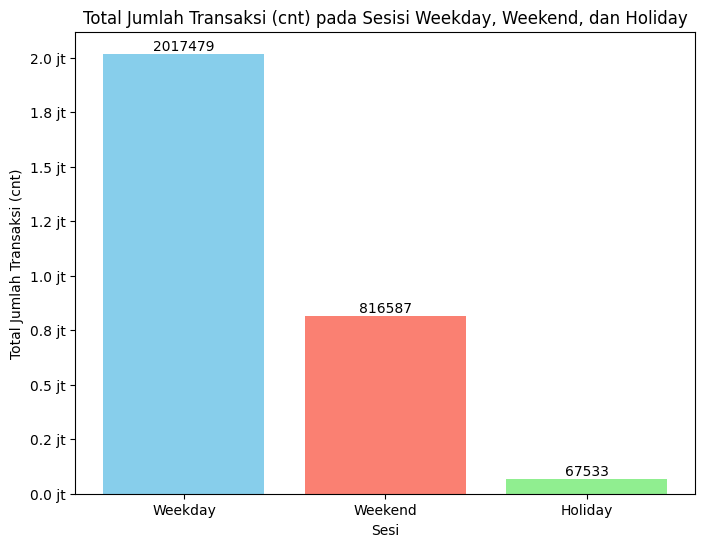

In [23]:
# Mengelompokkan data berdasarkan sesi (Weekday, Weekend, Holiday)
grouped_data = hour_df.groupby(['workingday', 'holiday'])['cnt'].sum().reset_index()

# Memfilter data untuk sesi Weekday
weekday_total = grouped_data[(grouped_data['workingday'] == 1) & (grouped_data['holiday'] == 0)]['cnt'].values[0]

# Memfilter data untuk sesi Weekend
weekend_total = grouped_data[(grouped_data['workingday'] == 0) & (grouped_data['holiday'] == 0)]['cnt'].values[0]

# Memfilter data untuk sesi Holiday
holiday_total = grouped_data[grouped_data['holiday'] == 1]['cnt'].values[0]

# Data untuk visualisasi
total_counts = [weekday_total, weekend_total, holiday_total]
sessions = ['Weekday', 'Weekend', 'Holiday']
colors = ['skyblue', 'salmon', 'lightgreen']

# Visualisasikan total cnt dalam bentuk bar chart
plt.figure(figsize=(8, 6))
plt.bar(sessions, total_counts, color=colors)
plt.xlabel('Sesi')
plt.ylabel('Total Jumlah Transaksi (cnt)')

# Tambahkan label nilai pada setiap bar
for i, total in enumerate(total_counts):
    plt.text(i, total + 1000, f'{total}', ha='center', va='bottom')

# Mengatur format angka pada sumbu Y
y_format = mticker.FuncFormatter(format_millions)
plt.gca().yaxis.set_major_formatter(y_format)
plt.title(f'Total Jumlah Transaksi (cnt) pada Sesisi Weekday, Weekend, dan Holiday')
plt.show()

### Pertanyaan 4 : Bagaimana pertumbuhan Konsumen dari waktu ke waktu?

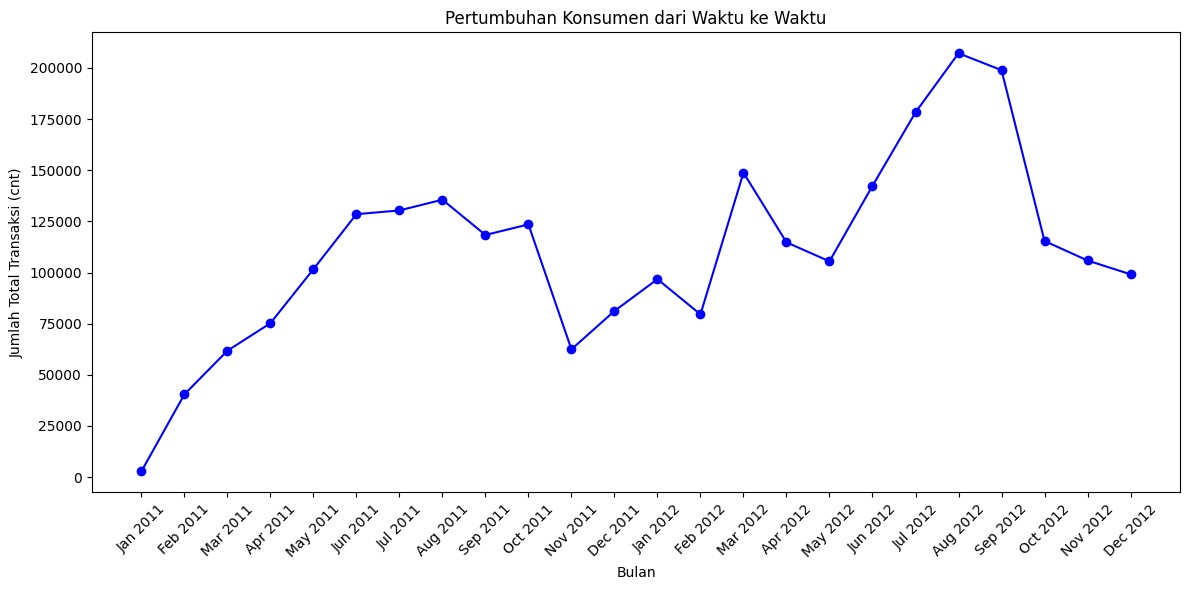

In [27]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah total "cnt" setiap bulan
monthly_counts = day_df.groupby(day_df['dteday'].dt.to_period('M'))['cnt'].sum()

# Data untuk visualisasi
months = monthly_counts.index.strftime('%b %Y')
counts = monthly_counts.values

# Membuat grafik garis
plt.figure(figsize=(12, 6))
plt.plot(months, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Total Transaksi (cnt)')
plt.title('Pertumbuhan Konsumen dari Waktu ke Waktu')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 5 : Bagaimana pengaruh suhu terhadap minat konsumen dalam melakukan transaksi?

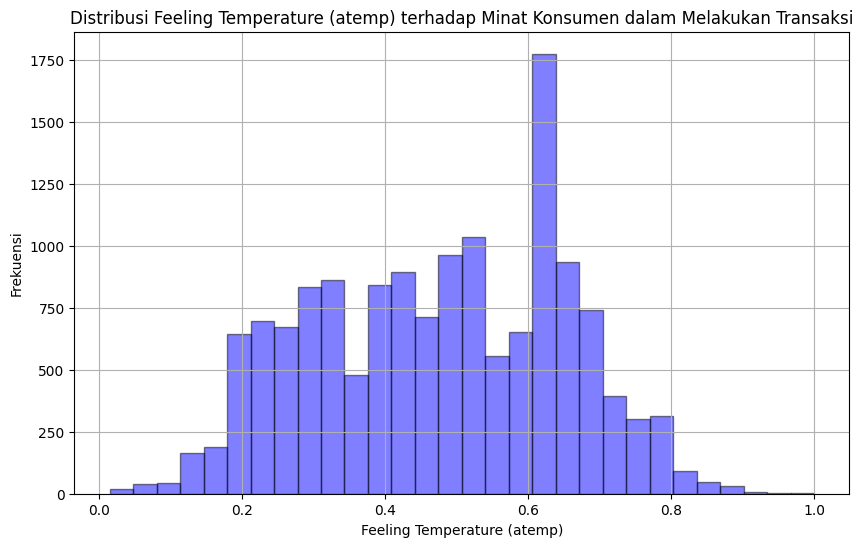

In [32]:
# Mengambil kolom "atemp" dan "cnt"
atemp = hour_df['atemp']
cnt = hour_df['cnt']

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(atemp, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Feeling Temperature (atemp)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Feeling Temperature (atemp) terhadap Minat Konsumen dalam Melakukan Transaksi')
plt.grid(True)

plt.show()

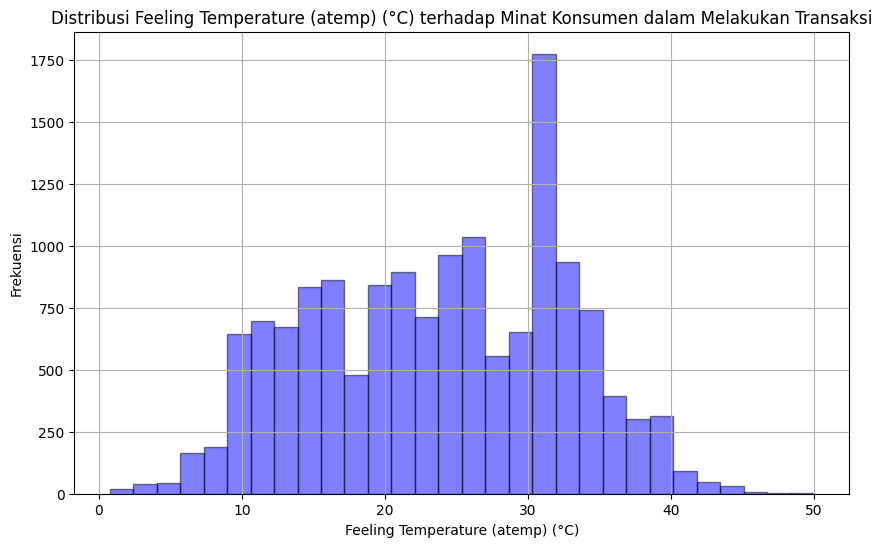

In [35]:
# Mengambil kolom "atemp" dan "cnt"
atemp_normalized = hour_df['atemp']
cnt = hour_df['cnt']

# Mengonversi nilai "atemp" dari yang dinormalisasi kembali ke derajat Celsius
atemp_celsius = atemp_normalized * 50.0

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(atemp_celsius, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Feeling Temperature (atemp) (°C)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Feeling Temperature (atemp) (°C) terhadap Minat Konsumen dalam Melakukan Transaksi')
plt.grid(True)

plt.show()

## Conclusion

- Musim Gugur menjadi musim dengan total konsumen terbanyak, hal tersebut ternyata memiliki keterikatan dengan pertanyaan 5 tentang pengaruh suhu
- Jumlah pelanggan terdaftar (member) lebih banyak melakukan peminjaman dibanding yang tidak terdaftar, maka dari itu terdapat kemungkinan bahwa peminjam yang telah terdaftar (member) lebih sering melakukan peminjaman secara berulang
- Weekday (Hari Kerja) menjadi hari dengan jumlah peminjam terbanyak, hal ini mengindikasikan bahwa kebanyakan peminjam menggunakan sepeda pinjamannya sebagai transportasi ke tempat kerja/sekolah
- Terjadi peningkatan konsumen di tahun 2012 jika dibandingkan dengan 2011, Namun selalu mengalami penurunan di akhir tahun, hal ini bisa saja disebabkan karena hari libur panjang sudah mulai tiba
- Frekuensi konsumen terbanyak adalah ketika suhu harian berada di nilai 0.6 atau 31-33 derajat celcius 

In [37]:
# Simpan DataFrame ke dalam file CSV
hour_df.to_csv('hour_cleaned.csv', index=False)
day_df.to_csv('day_cleaned.csv', index=False)